In [1]:
import pandas as pd
%matplotlib inline
pd.set_option("max_columns", 150)
pd.set_option('max_colwidth',40)
pd.options.display.float_format = '{:,.2f}'.format

open the Master.csv and Salaries.csv tables

In [2]:
master = pd.read_csv('Master.csv') # File with player details
salary = pd.read_csv('Salaries.csv') #File with baseball players' salaries

check to what type each item is with `print(table)`

In [3]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 24 columns):
playerID        18846 non-null object
birthYear       18703 non-null float64
birthMonth      18531 non-null float64
birthDay        18382 non-null float64
birthCountry    18773 non-null object
birthState      18220 non-null object
birthCity       18647 non-null object
deathYear       9336 non-null float64
deathMonth      9335 non-null float64
deathDay        9334 non-null float64
deathCountry    9329 non-null object
deathState      9277 non-null object
deathCity       9325 non-null object
nameFirst       18807 non-null object
nameLast        18846 non-null object
nameGiven       18807 non-null object
weight          17975 non-null float64
height          18041 non-null float64
bats            17655 non-null object
throws          17868 non-null object
debut           18653 non-null object
finalGame       18653 non-null object
retroID         18792 non-null object
bbrefID        

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25575 entries, 0 to 25574
Data columns (total 5 columns):
yearID      25575 non-null int64
teamID      25575 non-null object
lgID        25575 non-null object
playerID    25575 non-null object
salary      25575 non-null int64
dtypes: int64(2), object(3)
memory usage: 999.1+ KB


print out sample data with `table.head()`<br>
see additional options by pressing `ctrl + tab` over the `head()` method

In [5]:
master.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,"1,981.00",12.00,27.00,USA,CO,Denver,nan,nan,nan,NaN,NaN,NaN,David,Aardsma,David Allan,220.00,75.00,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,"1,934.00",2.00,5.00,USA,AL,Mobile,nan,nan,nan,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.00,72.00,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,"1,939.00",8.00,5.00,USA,AL,Mobile,"1,984.00",8.00,16.00,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.00,75.00,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,"1,954.00",9.00,8.00,USA,CA,Orange,nan,nan,nan,NaN,NaN,NaN,Don,Aase,Donald William,190.00,75.00,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,"1,972.00",8.00,25.00,USA,FL,Palm Beach,nan,nan,nan,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.00,73.00,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [6]:
salary.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


Now we join the two csv's using `pd.merge`.<br>
We want to keep all the players names in the `master` data set<br>
even if their salary is missing from the `salary` data set.<br>
We can always filter the NaN values out later

In [7]:
joined = pd.merge(left=master, right=salary, how="left")

see what columns the `joined` table contains

In [8]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39455 entries, 0 to 39454
Data columns (total 28 columns):
playerID        39455 non-null object
birthYear       39312 non-null float64
birthMonth      39140 non-null float64
birthDay        38991 non-null float64
birthCountry    39382 non-null object
birthState      37738 non-null object
birthCity       39228 non-null object
deathYear       9669 non-null float64
deathMonth      9668 non-null float64
deathDay        9667 non-null float64
deathCountry    9662 non-null object
deathState      9603 non-null object
deathCity       9658 non-null object
nameFirst       39416 non-null object
nameLast        39455 non-null object
nameGiven       39416 non-null object
weight          38584 non-null float64
height          38650 non-null float64
bats            38264 non-null object
throws          38477 non-null object
debut           39262 non-null object
finalGame       39262 non-null object
retroID         39401 non-null object
bbrefID        

check if all the players have a salary assigned. The easiest way is to deduct the length of the `joined` table from the `master` table

In [9]:
len(master) - len(joined)

-20609

Something went wrong. There are now more players in the `joined` data set than in the `master` data set.<br>
Some entries probably got duplicated<br>
Let's check if we have duplicate `playerIDs` by using `.value_counts()`

In [10]:
joined["playerID"].value_counts()

moyerja01    25
vizquom01    24
glavito02    23
thomeji01    22
bondsba01    22
griffke02    22
maddugr01    21
johnsra05    21
clemero02    21
rodrial01    21
gordoto01    21
smoltjo01    21
sheffga01    21
francjo01    21
rhodear01    20
rogerke01    20
oliveda02    20
rodriiv01    20
wellsda01    20
hawkila01    20
jonesch06    20
francju01    19
jeterde01    19
giambja01    19
ramirma02    19
gaettga01    19
biggicr01    19
larkiba01    19
santibe01    19
riverma01    19
             ..
schulha01     1
romoen01      1
smithkl01     1
cruziv01      1
colcoto01     1
baislje01     1
mcmilto01     1
fisheed02     1
slaybbi01     1
diazja01      1
ryderto01     1
hamando01     1
sampske01     1
sallesl01     1
johnsro02     1
raudmbo01     1
anderja01     1
vinesbo01     1
martist01     1
ostrobr01     1
mcanaji01     1
sandeke01     1
kirscha01     1
langedi01     1
matrada01     1
abadan01      1
powervi01     1
adamsgl01     1
bradfla01     1
proctre01     1
Name: playerID, dtype: i

Yep, we do.<br>
Let's filter out an arbitrary player to see why there is duplication

In [11]:
joined[joined["playerID"] == "moyerja01"]

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
24836,moyerja01,"1,962.00",11.00,18.00,USA,PA,Sellersville,nan,nan,nan,NaN,NaN,NaN,Jamie,Moyer,Jamie,170.00,72.00,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,"1,986.00",CHN,NL,"60,000.00"
24837,moyerja01,"1,962.00",11.00,18.00,USA,PA,Sellersville,nan,nan,nan,NaN,NaN,NaN,Jamie,Moyer,Jamie,170.00,72.00,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,"1,987.00",CHN,NL,"70,000.00"
24838,moyerja01,"1,962.00",11.00,18.00,USA,PA,Sellersville,nan,nan,nan,NaN,NaN,NaN,Jamie,Moyer,Jamie,170.00,72.00,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,"1,988.00",CHN,NL,"142,500.00"
24839,moyerja01,"1,962.00",11.00,18.00,USA,PA,Sellersville,nan,nan,nan,NaN,NaN,NaN,Jamie,Moyer,Jamie,170.00,72.00,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,"1,989.00",TEX,AL,"205,000.00"
24840,moyerja01,"1,962.00",11.00,18.00,USA,PA,Sellersville,nan,nan,nan,NaN,NaN,NaN,Jamie,Moyer,Jamie,170.00,72.00,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,"1,990.00",TEX,AL,"340,000.00"
24841,moyerja01,"1,962.00",11.00,18.00,USA,PA,Sellersville,nan,nan,nan,NaN,NaN,NaN,Jamie,Moyer,Jamie,170.00,72.00,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,"1,991.00",SLN,NL,"200,000.00"
24842,moyerja01,"1,962.00",11.00,18.00,USA,PA,Sellersville,nan,nan,nan,NaN,NaN,NaN,Jamie,Moyer,Jamie,170.00,72.00,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,"1,993.00",BAL,AL,"200,000.00"
24843,moyerja01,"1,962.00",11.00,18.00,USA,PA,Sellersville,nan,nan,nan,NaN,NaN,NaN,Jamie,Moyer,Jamie,170.00,72.00,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,"1,994.00",BAL,AL,"725,000.00"
24844,moyerja01,"1,962.00",11.00,18.00,USA,PA,Sellersville,nan,nan,nan,NaN,NaN,NaN,Jamie,Moyer,Jamie,170.00,72.00,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,"1,995.00",BAL,AL,"1,100,000.00"
24845,moyerja01,"1,962.00",11.00,18.00,USA,PA,Sellersville,nan,nan,nan,NaN,NaN,NaN,Jamie,Moyer,Jamie,170.00,72.00,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,"1,996.00",BOS,AL,"825,000.00"


As we can see, there are now salaries in the dataset for each year of the players carreer.<br>
We only want to have the most recent salary though.<br>
We therefore need to 'deduplicate' the data set.

In [12]:
deduplicated = joined.drop_duplicates("playerID", keep="last")

And let's do the check again

In [13]:
len(master) - len(deduplicated)

0

Now we van get into the interesting part: analysis!

## What is the average (mean, median, max, min) salary?

In [14]:
deduplicated["salary"].describe()

count        4,958.00
mean     1,692,477.94
std      3,243,005.10
min              0.00
25%        300,000.00
50%        507,500.00
75%      1,300,000.00
max     32,571,000.00
Name: salary, dtype: float64

## Who makes the most money?

In [15]:
max_salary = deduplicated["salary"].max()

In [16]:
deduplicated[deduplicated["salary"] == max_salary]

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
18735,kershcl01,"1,988.00",3.00,19.00,USA,TX,Dallas,nan,nan,nan,NaN,NaN,NaN,Clayton,Kershaw,Clayton Edward,225.00,76.00,L,L,2008-05-25,2015-10-04,kersc001,kershcl01,"2,015.00",LAN,NL,"32,571,000.00"


## What are the most common baseball players salaries?

Draw a histogram. <br>
*([documentation reference](http://agate.readthedocs.io/en/1.5.5/cookbook/charting.html?highlight=pivot))*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff639cfd470>]], dtype=object)

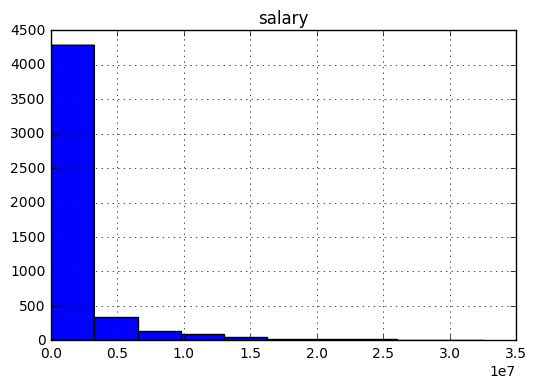

In [17]:
deduplicated.hist("salary")

We can do the same with the column `yearID` to see how recent our data is.<br>
We have 30 years in our data set, so we need to do some minor tweaking

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff639c2ab38>]], dtype=object)

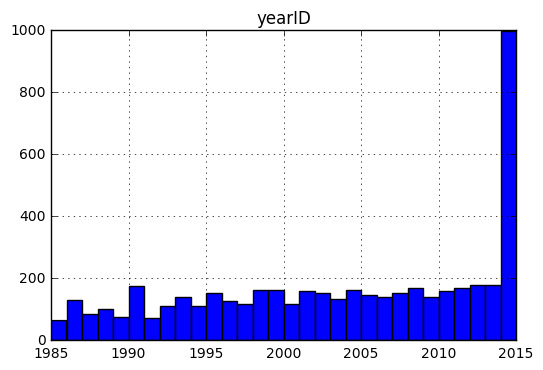

In [18]:
deduplicated.hist("yearID", bins=30)

## Who are the top 10% highest-paid players?

calculate the 90 percentile cutoff

In [20]:
top_10_p = deduplicated["salary"].quantile(q=0.9)

filter out players that make more money than the cutoff

In [21]:
best_paid = deduplicated[deduplicated["salary"] >= top_10_p]

use the `nlargest` to see the top 10 best paid players

In [22]:
best_paid_top_10 = best_paid.nlargest(10, "salary")
best_paid_top_10

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
18735,kershcl01,"1,988.00",3.00,19.00,USA,TX,Dallas,nan,nan,nan,NaN,NaN,NaN,Clayton,Kershaw,Clayton Edward,225.00,76.00,L,L,2008-05-25,2015-10-04,kersc001,kershcl01,"2,015.00",LAN,NL,"32,571,000.00"
36569,verlaju01,"1,983.00",2.00,20.00,USA,VA,Manakin Sabot,nan,nan,nan,NaN,NaN,NaN,Justin,Verlander,Justin Brooks,225.00,77.00,R,R,2005-07-04,2015-10-03,verlj001,verlaju01,"2,015.00",DET,AL,"28,000,000.00"
13538,greinza01,"1,983.00",10.00,21.00,USA,FL,Orlando,nan,nan,nan,NaN,NaN,NaN,Zack,Greinke,Donald Zachary,195.00,72.00,R,R,2004-05-22,2015-10-03,greiz001,greinza01,"2,015.00",LAN,NL,"25,000,000.00"
16479,howarry01,"1,979.00",11.00,19.00,USA,MO,St. Louis,nan,nan,nan,NaN,NaN,NaN,Ryan,Howard,Ryan James,250.00,76.00,L,L,2004-09-01,2015-09-14,howar001,howarry01,"2,015.00",PHI,NL,"25,000,000.00"
20087,leecl02,"1,978.00",8.00,30.00,USA,AR,Benton,nan,nan,nan,NaN,NaN,NaN,Cliff,Lee,Clifton Phifer,205.00,75.00,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,"2,014.00",PHI,NL,"25,000,000.00"
13538,greinza01,"1,983.00",10.00,21.00,USA,FL,Orlando,nan,nan,nan,NaN,NaN,NaN,Zack,Greinke,Donald Zachary,195.00,72.00,R,R,2004-05-22,2015-10-03,greiz001,greinza01,"2,015.00",LAN,NL,"25,000,000.00"
16479,howarry01,"1,979.00",11.00,19.00,USA,MO,St. Louis,nan,nan,nan,NaN,NaN,NaN,Ryan,Howard,Ryan James,250.00,76.00,L,L,2004-09-01,2015-09-14,howar001,howarry01,"2,015.00",PHI,NL,"25,000,000.00"
20087,leecl02,"1,978.00",8.00,30.00,USA,AR,Benton,nan,nan,nan,NaN,NaN,NaN,Cliff,Lee,Clifton Phifer,205.00,75.00,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,"2,014.00",PHI,NL,"25,000,000.00"
13538,greinza01,"1,983.00",10.00,21.00,USA,FL,Orlando,nan,nan,nan,NaN,NaN,NaN,Zack,Greinke,Donald Zachary,195.00,72.00,R,R,2004-05-22,2015-10-03,greiz001,greinza01,"2,015.00",LAN,NL,"25,000,000.00"
16479,howarry01,"1,979.00",11.00,19.00,USA,MO,St. Louis,nan,nan,nan,NaN,NaN,NaN,Ryan,Howard,Ryan James,250.00,76.00,L,L,2004-09-01,2015-09-14,howar001,howarry01,"2,015.00",PHI,NL,"25,000,000.00"


draw a chart

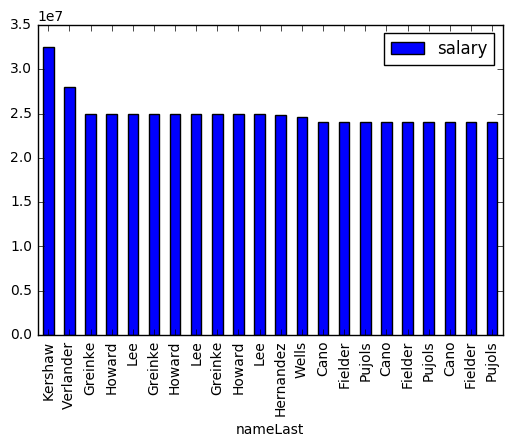

In [23]:
best_paid_top_10.plot(kind="bar", x="nameLast", y="salary")

save the data

In [24]:
best_paid.to_csv('highest-paid.csv')